In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [26]:
df_salary = pd.read_csv("salary.csv")#.dropna()

df_salary = df_salary.drop(['degree','otherqual','position','male'], axis=1)\

df_salary.head()

,salary,exprior,yearsworked,yearsrank,market,Field,yearsabs
0,53000.0,0,0,0,1.17,3,0
1,58000.0,1,0,0,1.24,2,0
2,45500.0,0,0,0,1.21,3,2
3,35782.0,0,2,1,0.99,4,1
4,34731.0,0,2,2,0.91,4,1


#### [Comment]
* Why drop these variable?
* Do .head() before and after transformation to make sure code does what you want it ti do
* Specify axis for .dropna(), but also check how many rows will be affected before dropping them

In [27]:
#defining the y variable
y = df_salary.salary

#splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_salary, y, test_size=0.3, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

((359, 7), (359L,))
((155, 7), (155L,))


##### [Comment]
* What about the X variable? Won't your salary be included in your X variables too this way?

## Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

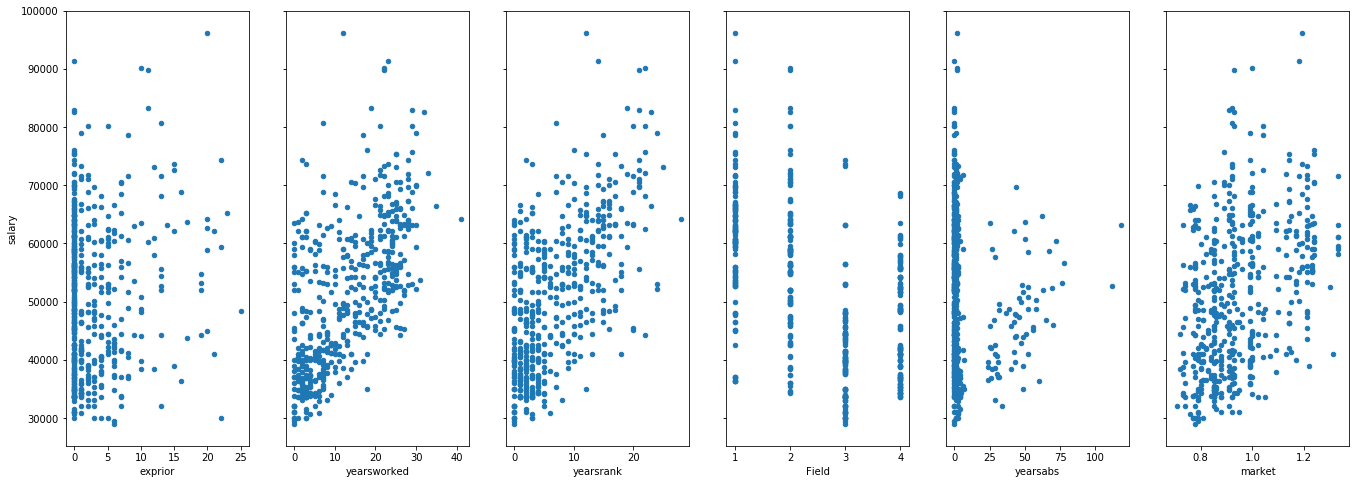

In [28]:
fig, axs = plt.subplots(1, 6, sharey=True)
df_salary.plot(kind='scatter', x='exprior', y='salary', ax=axs[0], figsize=(23, 8))
df_salary.plot(kind='scatter', x='yearsworked', y='salary', ax=axs[1])
df_salary.plot(kind='scatter', x='yearsrank', y='salary', ax=axs[2])
df_salary.plot(kind='scatter', x='Field', y='salary', ax=axs[3])
df_salary.plot(kind='scatter', x='yearsabs', y='salary', ax=axs[4])
df_salary.plot(kind='scatter', x='market', y='salary', ax=axs[5])

##### [Comment]
* Interpret results and how this helps you in developing/interpreting/eveluating the model

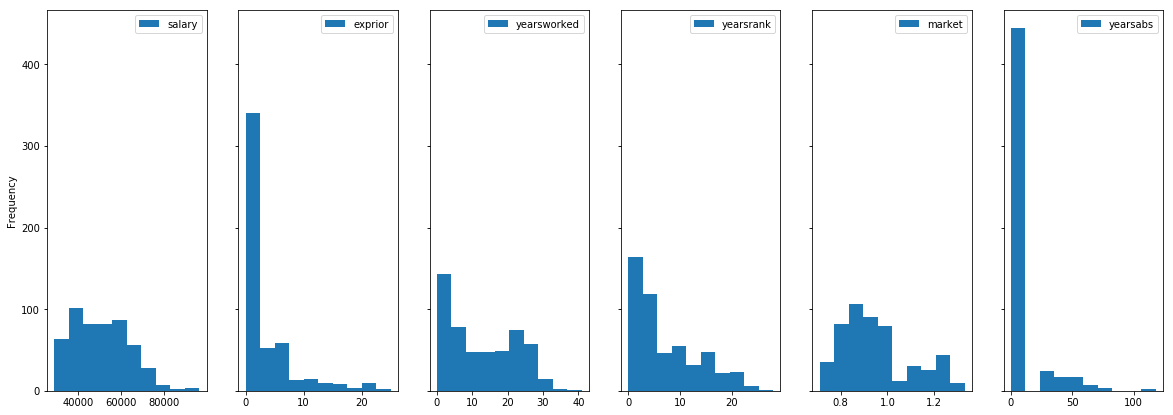

In [29]:
fig, axs = plt.subplots(1, 6, sharey=True)
df_salary.plot(kind='hist', y='salary', ax=axs[0], figsize=(20, 7))
df_salary.plot(kind='hist', y='exprior', ax=axs[1])
df_salary.plot(kind='hist', y='yearsworked', ax=axs[2])
df_salary.plot(kind='hist', y='yearsrank', ax=axs[3])
df_salary.plot(kind='hist', y='market', ax=axs[4])
df_salary.plot(kind='hist', y='yearsabs', ax=axs[5])

##### [Comment]
* Be decisive about most suitable way to present your data (histogram vs scatter) NOT both for some of the data
* Example: Field

In [30]:
# Statistic summary table
x_train.describe()

,salary,exprior,yearsworked,yearsrank,market,Field,yearsabs
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,51098.340072,3.155989,12.718663,7.153203,0.946602,2.481894,7.144847
std,12930.640561,5.104841,9.474250,6.492921,0.147628,1.108162,16.544376
min,29000.000000,0.000000,0.000000,0.000000,0.710000,1.000000,0.000000
25%,40033.000000,0.000000,4.000000,2.000000,0.840000,2.000000,0.000000
50%,49768.000000,1.000000,11.000000,5.000000,0.920000,2.000000,1.000000
75%,60703.433595,4.000000,21.000000,12.000000,1.010000,3.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,4.000000,118.000000


##### [Comment]
* Interpret results. Example, a distribution plot of full dataset vs training set can show you is your training set is representative of your data. Here, you can .describe() df_salary() and compare the stats (mean,std,25% & 75%), if too different, your training set might be not so good, resample

### One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [31]:
xg = x_train['Field']
pd.get_dummies(xg).head()

,1,2,3,4
419,0,1,0,0
135,1,0,0,0
386,0,0,1,0
122,0,1,0,0
22,0,0,0,1


##### [Comment]
* Already numerical, why get_dummies()?
* The dummies are not used in the model, why are they needed here?
* If different fields were disaggregated before training the model, the predictiong power & effect of field on salary could be tested 

### Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

In [32]:
x_train.corr()

,salary,exprior,yearsworked,yearsrank,market,Field,yearsabs
salary,1.000000,0.126978,0.606048,0.613583,0.396942,-0.503231,-0.089951
exprior,0.126978,1.000000,-0.290060,-0.124690,-0.027612,-0.078998,0.092107
yearsworked,0.606048,-0.290060,1.000000,0.835483,-0.065292,-0.281040,0.044402
yearsrank,0.613583,-0.124690,0.835483,1.000000,-0.016620,-0.296405,0.040202
market,0.396942,-0.027612,-0.065292,-0.016620,1.000000,-0.191952,-0.169517
Field,-0.503231,-0.078998,-0.281040,-0.296405,-0.191952,1.000000,0.033205
yearsabs,-0.089951,0.092107,0.044402,0.040202,-0.169517,0.033205,1.000000


##### [Comment]
* Interpret results
* Example: positive correlation above 50% between yearsworked & salary suggest yearsworked might have a strong predicting power on salary

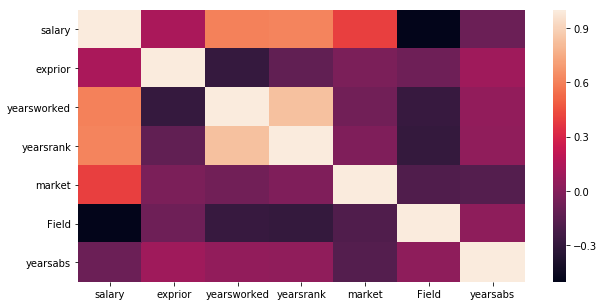

In [33]:
plt.figure(figsize=(10,5))
           
sns.heatmap(x_train.corr())

##### [Comment]
* Be decisive about how best to present your data. Avoid unnecessary repetition of data presentation

### Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [34]:
#created a fitted model in one line
l_model = smf.ols(formula='salary ~ exprior + yearsworked + yearsrank + market + Field + yearsabs', data=x_train).fit()

#print the coefficients
print(l_model.params)
#print(l_model.summary())

Intercept      11103.415466
exprior          770.547778
yearsworked      741.242701
yearsrank        291.378664
market         34253.751259
Field          -2399.589718
yearsabs         -58.497149
dtype: float64


##### [Comment]
* Over summarising a model does not help you understand how it can be tweaked. Break steps into smaller bites and have a good understanding of parameters being used in the model

### Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

In [35]:
predictions = l_model.predict()
residuals = l_model.resid
print('predictions:', predictions.shape,'\nresiduals:', residuals.shape)

('predictions:', (359L,), '\nresiduals:', (359L,))


##### [Comment]
* Header and results do not match

### Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

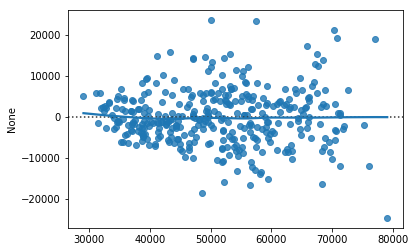

In [36]:
#seaborn.residplot(x, y, lowess=Tr
sns.residplot(predictions, residuals, lowess=True)


##### [Comment]
* Interpret results

## Run your model on the test set.

In [37]:
#created a fitted model in one line
l_model = smf.ols(formula='salary ~ exprior + yearsworked + yearsrank + market + Field + yearsabs', data=x_test).fit()

#print the coefficients
print(l_model.params)
#print(l_model.summary())

Intercept      11601.176061
exprior          636.289410
yearsworked      797.166908
yearsrank        170.512542
market         33497.092146
Field          -2288.815568
yearsabs         -50.690314
dtype: float64


##### [Comment] - VERY CRITICAL
* Use .predict() method, .fit() is to train the model 

### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

In [41]:
from sklearn import metrics
prediction = l_model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, prediction)))

prediction1 = l_model.predict(x_train)
print(np.sqrt(metrics.mean_squared_error(y_train, prediction1)))

##### [Comment] - VERY CRITICAL 
###### In last step, model was re-trained using x_test #### NOT 
* prediction variable will test the model using same data used to train it
* prediction1 variable will test the model using the training dataset